# Test OG-USA us_2025.py

In [82]:
# Import packages
import numpy as np
import pandas as pd
import pickle
import datetime as dt
import os
import matplotlib.pyplot as plt
from ogcore import output_plots as op

from bokeh.io import output_file, output_notebook
from bokeh.plotting import figure, show
from bokeh.models import (ColumnDataSource, Title, Legend, HoverTool,
                          NumeralTickFormatter)
from bokeh.models.annotations import Label, LabelSet
from bokeh.models.tickers import SingleIntervalTicker
from bokeh.core.property.numeric import Interval
from bokeh.palettes import Reds

In [83]:
# Set paths to work across Mac/Windows/Linux platforms
cur_path = "/Users/richardevans/Docs/Economics/OSE/OG/OG-USA/examples/US2025/"
data_dir = os.path.join(cur_path, 'data')
data_path = os.path.join(data_dir, 'cbo_debt_forecasts.csv')
images_dir = os.path.join(cur_path, 'images')

In [84]:
p_base_path = (
    "/Users/richardevans/Docs/Economics/OSE/OG/OG-USA/examples/US2025/" +
    "OUTPUT_BASELINE/model_params.pkl"
)
p_base = pickle.load(open(p_base_path, "rb"))
print(p_base.keys())

odict_keys(['frisch', 'g_y_annual', 'S', 'J', 'T', 'M', 'I', 'lambdas', 'e', 'starting_age', 'ending_age', 'constant_demographics', 'beta_annual', 'sigma', 'alpha_c', 'gamma', 'gamma_g', 'epsilon', 'io_matrix', 'Z', 'delta_annual', 'delta_g_annual', 'ltilde', 'world_int_rate_annual', 'initial_foreign_debt_ratio', 'zeta_D', 'zeta_K', 'tG1', 'tG2', 'alpha_T', 'alpha_G', 'alpha_I', 'alpha_bs_T', 'alpha_bs_G', 'alpha_bs_I', 'rho_G', 'alpha_RM_1', 'alpha_RM_T', 'g_RM', 'debt_ratio_ss', 'initial_debt_ratio', 'initial_Kg_ratio', 'r_gov_scale', 'r_gov_shift', 'cit_rate', 'c_corp_share_of_assets', 'adjustment_factor_for_cit_receipts', 'inv_tax_credit', 'tau_c', 'delta_tau_annual', 'h_wealth', 'm_wealth', 'p_wealth', 'tau_bq', 'tau_payroll', 'chi_b', 'chi_n', 'ubi_growthadj', 'ubi_nom_017', 'ubi_nom_1864', 'ubi_nom_65p', 'ubi_nom_max', 'eta', 'eta_RM', 'zeta', 'use_zeta', 'constant_rates', 'zero_taxes', 'analytical_mtrs', 'age_specific', 'retirement_age', 'pension_system', 'tau_p', 'indR', 'k_re

In [56]:
J = p_base.J
M = p_base.M
I = p_base.I
lambdas = p_base.lambdas
e = p_base.e
beta_annual = p_base.beta_annual
alpha_c = p_base.alpha_c
gamma = p_base.gamma
gamma_g = p_base.gamma_g
epsilon = p_base.epsilon
io_matrix = p_base.io_matrix
Z = p_base.Z
cit_rate = p_base.cit_rate
c_corp_share_of_assets = p_base.c_corp_share_of_assets
adjustment_factor_for_cit_receipts = p_base.adjustment_factor_for_cit_receipts
inv_tax_credit = p_base.inv_tax_credit
tau_c = p_base.tau_c
chi_b = p_base.chi_b
etr_params = p_base.etr_params
alpha_G = p_base.alpha_G


In [50]:
p_base.debt_ratio_ss

1.78

In [49]:
p_base.alpha_G

array([0.09069, 0.08872, 0.08619, 0.08306, 0.08296, 0.08099, 0.0794 ,
       0.07803, 0.07683, 0.07566, 0.07459, 0.07381, 0.07323, 0.07283,
       0.07257, 0.07233, 0.07209, 0.07185, 0.07162, 0.07138, 0.07115,
       0.07093, 0.0707 , 0.07048, 0.07026, 0.07005, 0.06984, 0.06963,
       0.06943, 0.06923, 0.06923, 0.06923, 0.06923, 0.06923, 0.06923,
       0.06923, 0.06923, 0.06923, 0.06923, 0.06923, 0.06923, 0.06923,
       0.06923, 0.06923, 0.06923, 0.06923, 0.06923, 0.06923, 0.06923,
       0.06923, 0.06923, 0.06923, 0.06923, 0.06923, 0.06923, 0.06923,
       0.06923, 0.06923, 0.06923, 0.06923, 0.06923, 0.06923, 0.06923,
       0.06923, 0.06923, 0.06923, 0.06923, 0.06923, 0.06923, 0.06923,
       0.06923, 0.06923, 0.06923, 0.06923, 0.06923, 0.06923, 0.06923,
       0.06923, 0.06923, 0.06923, 0.06923, 0.06923, 0.06923, 0.06923,
       0.06923, 0.06923, 0.06923, 0.06923, 0.06923, 0.06923, 0.06923,
       0.06923, 0.06923, 0.06923, 0.06923, 0.06923, 0.06923, 0.06923,
       0.06923, 0.06

In [41]:
p_base.alpha_G = p_base.alpha_G - 0.033
p_base.alpha_G

array([0.05769, 0.05572, 0.05319, 0.05006, 0.04996, 0.04799, 0.0464 ,
       0.04503, 0.04383, 0.04266, 0.04159, 0.04081, 0.04023, 0.03983,
       0.03957, 0.03933, 0.03909, 0.03885, 0.03862, 0.03838, 0.03815,
       0.03793, 0.0377 , 0.03748, 0.03726, 0.03705, 0.03684, 0.03663,
       0.03643, 0.03623, 0.03623, 0.03623, 0.03623, 0.03623, 0.03623,
       0.03623, 0.03623, 0.03623, 0.03623, 0.03623, 0.03623, 0.03623,
       0.03623, 0.03623, 0.03623, 0.03623, 0.03623, 0.03623, 0.03623,
       0.03623, 0.03623, 0.03623, 0.03623, 0.03623, 0.03623, 0.03623,
       0.03623, 0.03623, 0.03623, 0.03623, 0.03623, 0.03623, 0.03623,
       0.03623, 0.03623, 0.03623, 0.03623, 0.03623, 0.03623, 0.03623,
       0.03623, 0.03623, 0.03623, 0.03623, 0.03623, 0.03623, 0.03623,
       0.03623, 0.03623, 0.03623, 0.03623, 0.03623, 0.03623, 0.03623,
       0.03623, 0.03623, 0.03623, 0.03623, 0.03623, 0.03623, 0.03623,
       0.03623, 0.03623, 0.03623, 0.03623, 0.03623, 0.03623, 0.03623,
       0.03623, 0.03

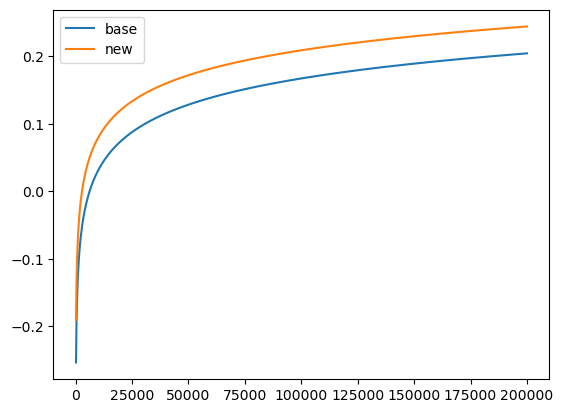

In [17]:
phi0, phi1 = etr_params[0][0]
r = 0.05
inc_vec = np.linspace(0, 200000, 1000)
tau1 = 1 -(phi0 * (inc_vec) ** (-phi1))
tau2 = 1 - ((1 - r)* phi0 * (inc_vec) ** (-phi1))
plt.plot(inc_vec, tau1, label='base')
plt.plot(inc_vec, tau2, label='new')
plt.legend()
plt.show()


In [85]:
ss_vars_base_path = (
    "/Users/richardevans/Docs/Economics/OSE/OG/OG-USA/examples/US2025/" +
    "OUTPUT_BASELINE/SS/SS_vars.pkl"
)
ss_vars_base = pickle.load(open(ss_vars_base_path, "rb"))
ss_vars_base.keys()
print("r_ss =", ss_vars_base['rss'])
print("TR_ss =", ss_vars_base['TR_ss'])
print("factor_ss =", ss_vars_base['factor_ss'])

r_ss = 0.03978805776352838
TR_ss = 0.048437483827267605
factor_ss = 164353.15847353433


## 2. Test debt-to-GDP paths

### 2.1. Test baseline debt-to-GDP path

In [86]:
tpi_vars_base_path = (
    "/Users/richardevans/Docs/Economics/OSE/OG/OG-USA/examples/US2025/" +
    "OUTPUT_BASELINE/TPI/TPI_vars.pkl"
)
tpi_vars_base = pickle.load(open(tpi_vars_base_path, "rb"))

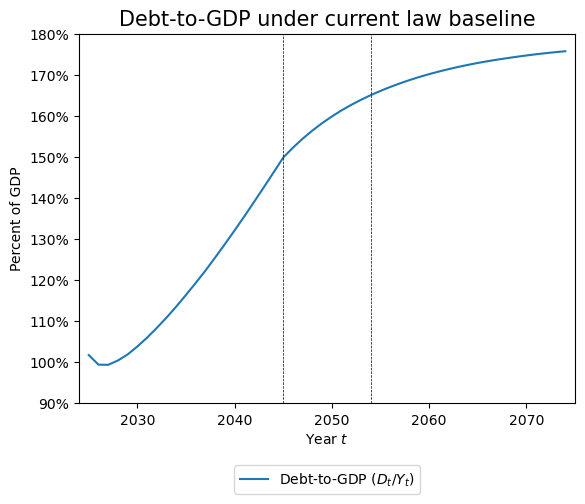

In [87]:
fig_debtGDP_base = op.plot_gdp_ratio(
    tpi_vars_base, p_base, start_year=p_base.start_year,
    vertical_line_years=[p_base.start_year + p_base.tG1, 2054],
    plot_title="Debt-to-GDP under current law baseline"
)

### 2.2. Test reform government spending cut debt-to-GDP path

In [88]:
tpi_vars_refG_path = (
    "/Users/richardevans/Docs/Economics/OSE/OG/OG-USA/examples/US2025/" +
    "OUTPUT_REFORM_G/TPI/TPI_vars.pkl"
)
tpi_vars_refG = pickle.load(open(tpi_vars_refG_path, "rb"))
params_refG_path = (
    "/Users/richardevans/Docs/Economics/OSE/OG/OG-USA/examples/US2025/" +
    "OUTPUT_REFORM_G/model_params.pkl"
)
p_refG = pickle.load(open(params_refG_path, "rb"))

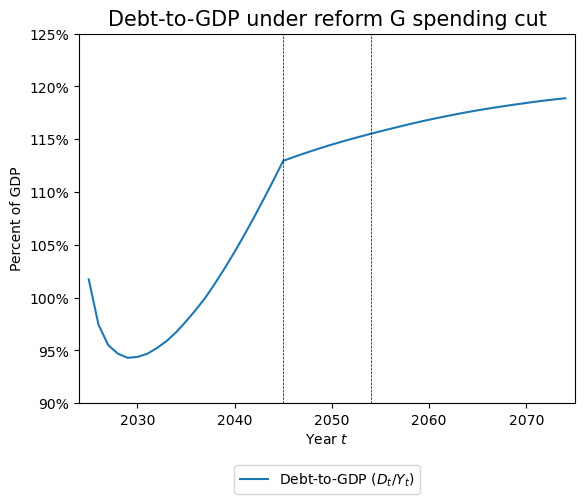

In [89]:
fig_debtGDP_refG = op.plot_gdp_ratio(
    tpi_vars_refG, p_refG, start_year=p_base.start_year,
    vertical_line_years=[p_base.start_year + p_base.tG1, 2054],
    plot_title="Debt-to-GDP under reform G spending cut"
)

### 2.3. Test reform labor productivity growth debt-to-GDP path

In [100]:
tpi_vars_refGr_path = (
    "/Users/richardevans/Docs/Economics/OSE/OG/OG-USA/examples/US2025/" +
    "OUTPUT_REFORM_Gr/TPI/TPI_vars.pkl"
)
tpi_vars_refGr = pickle.load(open(tpi_vars_refGr_path, "rb"))
params_refGr_path = (
    "/Users/richardevans/Docs/Economics/OSE/OG/OG-USA/examples/US2025/" +
    "OUTPUT_REFORM_Gr/model_params.pkl"
)
p_refGr = pickle.load(open(params_refGr_path, "rb"))

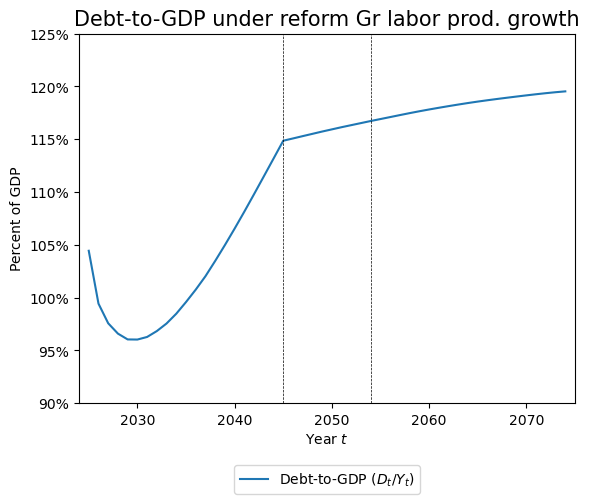

In [101]:
fig_debtGDP_refGr = op.plot_gdp_ratio(
    tpi_vars_refGr, p_refGr, start_year=p_base.start_year,
    vertical_line_years=[p_base.start_year + p_base.tG1, 2054],
    plot_title="Debt-to-GDP under reform Gr labor prod. growth"
)

### 2.4. Test reform TFP increase from regulatory reform debt-to-GDP path

In [106]:
tpi_vars_refregref_path = (
    "/Users/richardevans/Docs/Economics/OSE/OG/OG-USA/examples/US2025/" +
    "OUTPUT_REFORM_RegRef/TPI/TPI_vars.pkl"
)
tpi_vars_refregref = pickle.load(open(tpi_vars_refregref_path, "rb"))
params_refregref_path = (
    "/Users/richardevans/Docs/Economics/OSE/OG/OG-USA/examples/US2025/" +
    "OUTPUT_REFORM_RegRef/model_params.pkl"
)
p_refregref = pickle.load(open(params_refregref_path, "rb"))

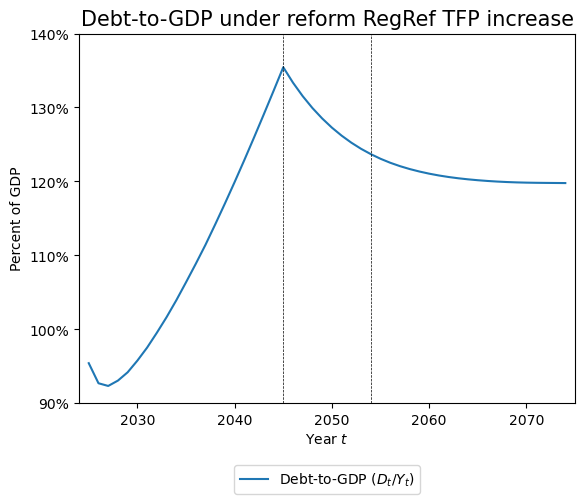

In [107]:
fig_debtGDP_refregref = op.plot_gdp_ratio(
    tpi_vars_refregref, p_refregref, start_year=p_base.start_year,
    vertical_line_years=[p_base.start_year + p_base.tG1, 2054],
    plot_title="Debt-to-GDP under reform RegRef TFP increase"
)

## 3. Three Plots for One Sheet

### 3.1. CBO debt forecasts

In [93]:
# Read data from cbo_debt_forecasts.csv
debt_frcst_df = pd.read_csv(
    data_path, header=5, dtype={
        'year': pd.Int64Dtype(),
        'jun_2009': np.float64,
        'jun_2009_frcst': pd.Int64Dtype(),
        'jun_2010': np.float64,
        'jun_2010_frcst': pd.Int64Dtype(),
        'jun_2011': np.float64,
        'jun_2011_frcst': pd.Int64Dtype(),
        'jun_2012': np.float64,
        'jun_2012_frcst': pd.Int64Dtype(),
        'sep_2013': np.float64,
        'sep_2013_frcst': pd.Int64Dtype(),
        'jul_2014': np.float64,
        'jul_2014_frcst': pd.Int64Dtype(),
        'jun_2015': np.float64,
        'jun_2015_frcst': pd.Int64Dtype(),
        'jul_2016': np.float64,
        'jul_2016_frcst': pd.Int64Dtype(),
        'jan_2017': np.float64,
        'jan_2017_frcst': pd.Int64Dtype(),
        'mar_2017': np.float64,
        'mar_2017_frcst': pd.Int64Dtype(),
        'jun_2018': np.float64,
        'jun_2018_frcst': pd.Int64Dtype(),
        'jan_2019': np.float64,
        'jan_2019_frcst': pd.Int64Dtype(),
        'jun_2019': np.float64,
        'jun_2019_frcst': pd.Int64Dtype(),
        'jan_2020': np.float64,
        'jan_2020_frcst': pd.Int64Dtype(),
        'sep_2020': np.float64,
        'sep_2020_frcst': pd.Int64Dtype(),
        'mar_2021': np.float64,
        'mar_2021_frcst': pd.Int64Dtype(),
        'may_2022': np.float64,
        'may_2022_frcst': pd.Int64Dtype(),
        'jul_2022': np.float64,
        'jul_2022_frcst': pd.Int64Dtype(),
        'feb_2023': np.float64,
        'feb_2023_frcst': pd.Int64Dtype(),
        'jun_2023': np.float64,
        'jun_2023_frcst': pd.Int64Dtype(),
        'feb_2024': np.float64,
        'feb_2024_frcst': pd.Int64Dtype(),
        'mar_2024': np.float64,
        'mar_2024_frcst': pd.Int64Dtype(),
    },
    skiprows=0
)

def gen_tseries_frcst(
    frcst_var_list, legend_label_list, df=debt_frcst_df, main_start_year='min', main_end_year='max', full_start_year='min', full_end_year='max',
    note_text_list=[], fig_title_str='', fig_path=''
):
    """
    This function creates a plot of multiple time series of CBO forecasts of
    U.S. publicly held national debt.
    """
    # Create Variables for min and max values
    if main_start_year == 'min':
        main_min_year = df['year'].min()
    else:
        main_min_year = int(main_start_year)
    if full_start_year == 'min':
        full_min_year = df['year'].min()
    else:
        full_min_year = int(full_start_year)
    if main_end_year == 'max':
        main_max_year = df['year'].max()
    else:
        main_max_year = int(main_end_year)
    if full_end_year == 'max':
        full_max_year = df['year'].max()
    else:
        full_max_year = int(full_end_year)
    df_full = df[(df['year'] >= full_min_year) & (df['year'] <= full_max_year)]
    df_main = df[(df['year'] >= main_min_year) & (df['year'] <= main_max_year)]
    # Find the min and max yvar values across the list of yvars and create
    # separate ColumnDataSource objects for each forecast series (this helps
    # with the hovertools)
    main_min_yvar = 100
    main_max_yvar = 0
    cds_list = []
    for k, yvar in enumerate(frcst_var_list):
        main_min_yvar = np.minimum(main_min_yvar, df_main[yvar].min())
        main_max_yvar = np.maximum(main_max_yvar, df_main[yvar].max())
        frcst_df = df_full[['year', yvar, yvar + '_frcst']].dropna()
        frcst_df['frcst'] = frcst_df[yvar + '_frcst'] = 1
        frcst_df['frcst_label'] = legend_label_list[k]
        frcst_df.rename(columns={yvar: 'debt_gdp'}, inplace=True)
        frcst_df = frcst_df[['year', 'debt_gdp', 'frcst', 'frcst_label']]
        cds_list.append(ColumnDataSource(frcst_df))

    # Output to HTML file
    fig_title = fig_title_str
    fig_path = fig_path
    output_file(fig_path, title=fig_title, mode='inline')
    output_notebook()

    fig = figure(
        title=fig_title,
        height=600,
        width=1100,
        x_axis_label='Year',
        x_range=(main_min_year - 1, main_max_year + 1),
        y_axis_label='Percent of Gross Domestic Product',
        y_range=(main_min_yvar - 5, main_max_yvar + 5),
        tools=['save', 'zoom_in', 'zoom_out', 'box_zoom',
               'pan', 'undo', 'redo', 'reset', 'help'],
        toolbar_location='left')
    fig.toolbar.logo = None

    # Set title font size and axes font sizes
    fig.title.text_font_size = '17pt'
    fig.xaxis.axis_label_text_font_size = '12pt'
    fig.xaxis.major_label_text_font_size = '12pt'
    fig.yaxis.axis_label_text_font_size = '12pt'
    fig.yaxis.major_label_text_font_size = '12pt'

    # Modify tick intervals for X-axis and Y-axis
    fig.xaxis.ticker = SingleIntervalTicker(interval=10, num_minor_ticks=2)
    fig.xgrid.ticker = SingleIntervalTicker(interval=10)
    fig.yaxis.ticker = SingleIntervalTicker(interval=20, num_minor_ticks=2)
    fig.ygrid.ticker = SingleIntervalTicker(interval=20)

    min_256_color_ind = 0
    max_256_color_ind = 200
    intercept = max_256_color_ind
    slope = (min_256_color_ind - intercept) / (len(frcst_var_list) - 1)

    legend_item_list = []
    for k, v in enumerate(frcst_var_list):
        if v == 'mar_2024':
            line = fig.line(
                x='year', y='debt_gdp', source=cds_list[k], color="black", line_width=5, alpha=0.7, muted_alpha=0.15
            )
        else:
            color_ind = int(np.round(slope * k + intercept))
            line = fig.line(
                x='year', y='debt_gdp', source=cds_list[k],
                color=Reds[256][color_ind], line_width=3, alpha=0.7,
                muted_alpha=0.15
            )
        legend_item_list.append((legend_label_list[k], [line]))

    # Add information on hover
    tooltips = [('Year', '@year'),
                ('Debt/GDP','@debt_gdp'),
                ('Forecast', '@frcst'),
                ('Forecast date', '@frcst_label')]
    fig.add_tools(HoverTool(tooltips=tooltips, toggleable=False))

    # Add legend
    legend = Legend(items=legend_item_list, location='center')
    fig.add_layout(legend, 'right')
    fig.legend.border_line_width = 1
    fig.legend.border_line_color = 'black'
    fig.legend.border_line_alpha = 1
    fig.legend.label_text_font_size = '4mm'

    # Set legend muting click policy
    fig.legend.click_policy = 'mute'

    # Add notes below image
    for note_text in note_text_list:
        caption = Title(text=note_text, align='left', text_font_size='4mm',
                        text_font_style='italic')
        fig.add_layout(caption, 'below')

    return fig

frcst_var_list = [
    'jun_2009', 'jun_2010', 'jun_2011', 'jun_2012', 'sep_2013', 'jul_2014',
    'jun_2015', 'jul_2016', 'jan_2017', 'mar_2017', 'jun_2018', 'jan_2019',
    'jun_2019', 'jan_2020', 'sep_2020', 'mar_2021', 'may_2022', 'jul_2022',
    'feb_2023', 'jun_2023', 'feb_2024', 'mar_2024']
legend_label_list = [
    'Jun. 2009', 'Jun. 2010', 'Jun. 2011', 'Jun. 2012', 'Sep. 2013',
    'Jul. 2014', 'Jun. 2015', 'Jul. 2016', 'Jan. 2017', 'Mar. 2017',
    'Jun. 2018', 'Jan. 2019', 'Jun. 2019', 'Jan. 2020', 'Sep. 2020',
    'Mar. 2021', 'May 2022', 'Jul. 2022', 'Feb. 2023', 'Jun. 2023',
    'Feb. 2024', 'Mar. 2024']
note_text_list = \
    [
        ('Source: U.S. publicly held debt-to-GDP forecasts (extended ' +
            'baseline) from Congressional Budget Office Long-term Budget ' +
            'Outlook reports in'),
        ('   data associated with underlying figures, Long-term Budget ' +
            'Projections Data (https://www.cbo.gov/data/budget-economic-' +
            'data#1), and'),
        ('   Historical Budget Data (https://www.cbo.gov/data/budget-' +
            'economic-data#2). Richard W. Evans (@rickecon).')
    ]

# Create publicly held debt forecasts figure
fig_title = (
    "Comparison of 22 CBO Forecasts of U.S. Publicly Held Debt-to-GDP: " +
    "2009-2024"
)
fig_path = os.path.join(images_dir, 'tseries_pubdebt_gdp_frcsts.html')
pubdebt_gdp_frcsts_tseries = gen_tseries_frcst(
    frcst_var_list, legend_label_list,
    main_start_year=1915, main_end_year=2054,
    full_start_year='min', full_end_year='max',
    note_text_list=note_text_list,
    fig_title_str=fig_title, fig_path=fig_path
)

show(pubdebt_gdp_frcsts_tseries)

Loading BokehJS ...

### 3.2. CBO debt forecasts vs. three reforms

In [109]:
data_path2 = os.path.join(data_dir, 'cbo_debt_forecasts.csv')
# Read in data from cbo_debt_forecasts.csv for year and mar_2024 for years
# 2025-2054
df2 = pd.read_csv(
    data_path2, header=5, dtype={
        'year': pd.Int64Dtype(),
        'mar_2024': np.float64
    },
    skiprows=0
)
# Drop extraneous years and columns and rename CBO forecast column
df2 = df2[["year", "mar_2024"]][(df2['year'] >= 2025) & (df2['year'] <= 2054)]
df2.rename(columns={"mar_2024": "cbo_mar_2024"}, inplace=True)

tpi_vars_G_path = (
    "/Users/richardevans/Docs/Economics/OSE/OG/OG-USA/examples/US2025/" +
    "OUTPUT_REFORM_G/TPI/TPI_vars.pkl"
)
tpi_vars_G = pickle.load(open(tpi_vars_G_path, "rb"))
D_G = tpi_vars_G['D']
Y_G = tpi_vars_G['Y']
df2["ogusa_G"] = (D_G / Y_G)[:30] * 100

tpi_vars_gr_path = (
    "/Users/richardevans/Docs/Economics/OSE/OG/OG-USA/examples/US2025/" +
    "OUTPUT_REFORM_Gr/TPI/TPI_vars.pkl"
)
tpi_vars_gr = pickle.load(open(tpi_vars_gr_path, "rb"))
D_gr = tpi_vars_gr['D']
Y_gr = tpi_vars_gr['Y']
df2["ogusa_gr"] = (D_gr / Y_gr)[:30] * 100

# tpi_vars_tax_path = (
#     "/Users/richardevans/Docs/Economics/OSE/OG/OG-USA/examples/US2025/" +
#     "OUTPUT_REFORM_Tax/TPI/TPI_vars.pkl"
# )
# tpi_vars_tax = pickle.load(open(tpi_vars_tax_path, "rb"))
# D_tax = tpi_vars_tax['D']
# Y_tax = tpi_vars_tax['Y']
# df2["ogusa_tax"] = (D_tax / Y_tax)[:30] * 100

# tpi_vars_regref_path = (
#     "/Users/richardevans/Docs/Economics/OSE/OG/OG-USA/examples/US2025/" +
#     "OUTPUT_REFORM_RegRef/TPI/TPI_vars.pkl"
# )
# tpi_vars_regref = pickle.load(open(tpi_vars_regref_path, "rb"))
# D_regref = tpi_vars_regref['D']
# Y_regref = tpi_vars_regref['Y']
# df2["ogusa_regref"] = (D_regref / Y_regref)[:30] * 100

def gen_tseries_dy(
    var_list, legend_label_list, df, color_list, marker_list, start_year='min',
    end_year='max', note_text_list=[], fig_title_str='', fig_path=''
):
    """
    This function creates a plot of multiple time series of forecasts of
    U.S. publicly held national debt.
    """
    # Create Variables for min and max values
    if start_year == 'min':
        min_year = df['year'].min()
    else:
        min_year = int(start_year)
    if end_year == 'max':
        max_year = df['year'].max()
    else:
        max_year = int(end_year)
    df_main = df[(df['year'] >= min_year) & (df['year'] <= max_year)]
    # Find the min and max yvar values across the list of yvars and create
    # separate ColumnDataSource objects for each forecast series (this helps
    # with the hovertools)
    min_yvar = 100
    max_yvar = 0
    cds_list = []
    for k, yvar in enumerate(var_list):
        min_yvar = np.minimum(min_yvar, df_main[yvar].min())
        max_yvar = np.maximum(max_yvar, df_main[yvar].max())
        frcst_df = df_main[['year', yvar]].dropna()
        frcst_df.rename(columns={yvar: 'debt_gdp'}, inplace=True)
        frcst_df = frcst_df[['year', 'debt_gdp']]
        cds_list.append(ColumnDataSource(frcst_df))

    # Output to HTML file
    fig_title = fig_title_str
    fig_path = fig_path
    output_file(fig_path, title=fig_title, mode='inline')
    output_notebook()

    fig = figure(
        title=fig_title,
        height=600,
        width=1100,
        x_axis_label='Year',
        x_range=(min_year - 1, max_year + 1),
        y_axis_label='Percent of Gross Domestic Product',
        y_range=(min_yvar - 5, max_yvar + 5),
        toolbar_location=None
    )

    # Set title font size and axes font sizes
    fig.title.text_font_size = '15pt'
    fig.xaxis.axis_label_text_font_size = '12pt'
    fig.xaxis.major_label_text_font_size = '12pt'
    fig.yaxis.axis_label_text_font_size = '12pt'
    fig.yaxis.major_label_text_font_size = '12pt'

    # Modify tick intervals for X-axis and Y-axis
    fig.xaxis.ticker = SingleIntervalTicker(interval=5, num_minor_ticks=5)
    fig.xgrid.ticker = SingleIntervalTicker(interval=5)
    fig.yaxis.ticker = SingleIntervalTicker(interval=10, num_minor_ticks=2)
    fig.ygrid.ticker = SingleIntervalTicker(interval=10)

    # Create lines and markers for time series
    for k, yvar in enumerate(var_list):
        fig.line(
            x='year', y='debt_gdp', source=cds_list[k], color=color_list[k],
            line_width=3, alpha=0.7
        )
        fig.scatter(
            x='year', y='debt_gdp', source=cds_list[k], size=8, line_width=1,
            line_color='black', fill_color=color_list[k],
            marker=marker_list[k], line_alpha=0.7, fill_alpha=0.7,
            legend_label=legend_label_list[k]
        )

    # Add horizontal dashed line at 120
    fig.segment(x0=2025, y0=120, x1=2054, y1=120, color='black',
                line_dash='6 4', line_width=2)

    # Add information on hover
    tooltips = [('Year', '@year'),
                ('Debt/GDP','@debt_gdp{0.0}' + '%')]
    fig.add_tools(HoverTool(tooltips=tooltips, toggleable=False))

    # Add legend
    fig.legend.location = 'top_center'
    fig.legend.border_line_width = 1
    fig.legend.border_line_color = 'black'
    fig.legend.border_line_alpha = 1
    fig.legend.label_text_font_size = '4mm'

    # Add notes below image
    for note_text in note_text_list:
        caption = Title(text=note_text, align='left', text_font_size='4mm',
                        text_font_style='italic')
        fig.add_layout(caption, 'below')

    return fig


# Create figure of baseline and reform debt-to-GDP time paths
frcst_var_list2 = ['cbo_mar_2024', 'ogusa_G', 'ogusa_gr']
color_list2 = ['black', 'green', '#C584DB']
marker_list2 = ['circle', 'triangle', 'diamond']
legend_label_list2 = [
    'CBO Mar. 2024 forecast', 'Gov\'t discretionary spending cut',
    'Increase in labor productivity'
]
note_text_list2 = \
    [
        ('Source: CBO baseline and OG-USA reform forecasts from simulations ' +
            'in Appendix D. One reform is to reduce government ' +
            'discretionary spending by 1.7 per-'),
        ('   centage points. The other reform is to increase personal ' +
            'income marginal tax rates and the corporate income tax rate ' +
            'by 34 percent.'),
    ]

fig_title2 = (
    "Debt-to-GDP in Two Reforms Forecasts versus Baseline, 2025-2054"
)
fig_path2 = os.path.join(images_dir, 'tseries_pubdebt_gdp_base_reforms.html')
pubdebt_gdp_base_reforms_tseries = gen_tseries_dy(
    frcst_var_list2, legend_label_list2, df2, color_list2, marker_list2,
    start_year=2025, end_year=2054, note_text_list=[],
    fig_title_str=fig_title2, fig_path=fig_path2
)
show(pubdebt_gdp_base_reforms_tseries)

Loading BokehJS ...

### 3.3. Nominal GDP time series: baseline vs TFP increase (reg reform)

In [110]:
data_path3 = os.path.join(data_dir, 'gdp_cbo_mar_2024.csv')
# Read in data from gdp_cbo_mar_2024.csv for year and gdp_cbo_mar_2024.csv for
# years 2025-2054
df3 = pd.read_csv(
    data_path3, header=4, dtype={
        'year': pd.Int64Dtype(),
        'gdp_cbo_mar_2024': np.float64
    },
    skiprows=0
)
# Drop extraneous years and columns and rename CBO forecast column
df3 = df3[["year", "gdp_cbo_mar_2024"]][
    (df3['year'] >= 2025) & (df3['year'] <= 2054)
]
df3.rename(columns={"gdp_cbo_mar_2024": "gdp_base"}, inplace=True)

tpi_vars_regref_path = (
    "/Users/richardevans/Docs/Economics/OSE/OG/OG-USA/examples/US2025/" +
    "OUTPUT_REFORM_RegRef/TPI/TPI_vars.pkl"
)
tpi_vars_regref = pickle.load(open(tpi_vars_regref_path, "rb"))
df3["Y_base"] = tpi_vars_base["Y"][:30]
df3["Y_regref"] = tpi_vars_regref["Y"][:30]
df3["gdp_regref"] = df3["gdp_base"] * (df3["Y_regref"] / df3["Y_base"])
df3["gdp_diff"] = df3["gdp_regref"] - df3["gdp_base"]

# Create Variables for min and max values
min_year = df3['year'].min()
max_year = df3['year'].max()
# Find the min and max yvar values across the list of yvars and create
# separate ColumnDataSource objects for each forecast series (this helps
# with the hovertools)
min_yvar = df3['gdp_diff'].min()
max_yvar = df3['gdp_diff'].max()
y_buffer_pct = 0.08
y_buffer_amt = (max_yvar - min_yvar) * y_buffer_pct
cds3 = ColumnDataSource(df3)

# Output to HTML file
fig_title3 = (
    "Increase in GDP ($tril) increased TFP from regulatory reform: 2025-2054"
)
fig_path3 = os.path.join(images_dir, 'tseries_gdp_base_regref_diff.html')
output_file(fig_path3, title=fig_title3, mode='inline')
output_notebook()

fig3 = figure(
    title=fig_title3,
    height=600,
    width=1100,
    x_axis_label='Year',
    x_range=(min_year - 1, max_year + 1),
    y_axis_label='Difference in GDP ($trilions)',
    y_range=(min_yvar - y_buffer_amt, max_yvar + y_buffer_amt),
    toolbar_location=None
)

# Set title font size and axes font sizes
fig3.title.text_font_size = '17pt'
fig3.xaxis.axis_label_text_font_size = '12pt'
fig3.xaxis.major_label_text_font_size = '12pt'
fig3.yaxis.axis_label_text_font_size = '12pt'
fig3.yaxis.major_label_text_font_size = '12pt'

# Modify tick intervals for X-axis and Y-axis
fig3.xaxis.ticker = SingleIntervalTicker(interval=5, num_minor_ticks=5)
fig3.xgrid.ticker = SingleIntervalTicker(interval=5)
fig3.yaxis.ticker = SingleIntervalTicker(interval=0.5, num_minor_ticks=2)
fig3.ygrid.ticker = SingleIntervalTicker(interval=0.5)

# Create lines and markers for time series
fig3.line(
    x='year', y='gdp_diff', source=cds3, color="blue", line_width=5, alpha=0.7
)
fig3.scatter(
    x='year', y='gdp_diff', source=cds3, size=8, line_width=1,
    line_color='black', fill_color="blue", marker='circle', line_alpha=0.7,
    fill_alpha=0.7
)

# Add information on hover
tooltips = [('Year', '@year'),
            ('Difference ($tril)','@gdp_diff{0.000}')]
fig3.add_tools(HoverTool(tooltips=tooltips, toggleable=False))

# Add notes below image
note_text_list3 = []
# note_text_list3 = [
#     (
#         'Source: CBO baseline and OG-USA reform forecasts from simulations ' +
#         'in Appendix D.'
#     ),
# ]
for note_text in note_text_list3:
    caption = Title(text=note_text, align='left', text_font_size='4mm',
                    text_font_style='italic')
    fig3.add_layout(caption, 'below')

show(fig3)

Loading BokehJS ...